In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate(); Pkg.add("Flux")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/modelzoo/model-zoo/notebooks/tutorials/Project.toml`
 [no changes]
  Updating `~/modelzoo/model-zoo/notebooks/tutorials/Manifest.toml`
  [b4f34e82] ↑ Distances v0.7.3 ⇒ v0.7.4
  [6fe1bfb0] ↑ OffsetArrays v0.9.0 ⇒ v0.9.1
  [92933f4c] ↑ ProgressMeter v0.8.0 ⇒ v0.9.0


Deep Learning with Flux: A 60 Minute Blitz
=====================

This is a quick intro to [Flux](https://github.com/FluxML/Flux.jl) loosely
based on [PyTorch's
tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).
It introduces basic Julia programming, as well as Flux's automatic
differentiation (AD), which we'll use to build machine learning models. We'll
use this to build a very simple neural network.

Arrays
-------

The starting point for all of our models is the `Array` (sometimes referred to
as a `Tensor` in other frameworks). This is really just a list of numbers,
which might be arranged into a shape like a square. Let's write down an array
with three elements.

In [2]:
x = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

Here's a matrix – a square array with four elements.

In [3]:
x = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

We often work with arrays of thousands of elements, and don't usually write
them down by hand. Here's how we can create an array of 5×3 = 15 elements,
each a random number from zero to one.

In [4]:
x = rand(5, 3)

5×3 Array{Float64,2}:
 0.998702  0.0394119  0.239104 
 0.420407  0.393847   0.948541 
 0.410127  0.323206   0.0343261
 0.547495  0.802109   0.970252 
 0.604244  0.542671   0.828994 

There's a few functions like this; try replacing `rand` with `ones`, `zeros`,
or `randn` to see what they do.

By default, Julia works stores numbers is a high-precision format called
`Float64`. In ML we often don't need all those digits, and can ask Julia to
work with `Float32` instead. We can even ask for more digits using `BigFloat`.

In [5]:
x = rand(BigFloat, 5, 3)

5×3 Array{BigFloat,2}:
 5.0213e-01   1.56952e-02  3.60333e-01
 5.71864e-01  6.06184e-01  4.08497e-01
 2.04013e-01  3.26862e-01  2.61751e-01
 3.25588e-01  9.09144e-01  7.22072e-01
 5.43817e-01  3.2215e-01   2.59002e-01

In [6]:
x = rand(Float32, 5, 3)

5×3 Array{Float32,2}:
 0.725704  0.555171  0.994212
 0.465167  0.311251  0.295114
 0.115368  0.545709  0.283004
 0.534475  0.736066  0.35011 
 0.526305  0.899884  0.917461

We can ask the array how many elements it has.

In [7]:
length(x)

15

Or, more specifically, what size it has.

In [8]:
size(x)

(5, 3)

We sometimes want to see some elements of the array on their own.

In [9]:
x

5×3 Array{Float32,2}:
 0.725704  0.555171  0.994212
 0.465167  0.311251  0.295114
 0.115368  0.545709  0.283004
 0.534475  0.736066  0.35011 
 0.526305  0.899884  0.917461

In [10]:
x[2, 3]

0.2951138f0

This means get the second row and the third column. We can also get every row
of the third column.

In [11]:
x[:, 3]

5-element Array{Float32,1}:
 0.9942117 
 0.2951138 
 0.28300416
 0.35011005
 0.9174607 

We can add arrays, and subtract them, which adds or subtracts each element of
the array.

In [12]:
x + x

5×3 Array{Float32,2}:
 1.45141   1.11034   1.98842 
 0.930333  0.622503  0.590228
 0.230736  1.09142   0.566008
 1.06895   1.47213   0.70022 
 1.05261   1.79977   1.83492 

In [13]:
x - x

5×3 Array{Float32,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

Julia supports a feature called *broadcasting*, using the `.` syntax. This
tiles small arrays (or single numbers) to fill bigger ones.

In [14]:
x .+ 1

5×3 Array{Float32,2}:
 1.7257   1.55517  1.99421
 1.46517  1.31125  1.29511
 1.11537  1.54571  1.283  
 1.53448  1.73607  1.35011
 1.52631  1.89988  1.91746

We can see Julia tile the column vector `1:5` across all rows of the larger
array.

In [15]:
zeros(5,5) .+ (1:5)

5×5 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0
 2.0  2.0  2.0  2.0  2.0
 3.0  3.0  3.0  3.0  3.0
 4.0  4.0  4.0  4.0  4.0
 5.0  5.0  5.0  5.0  5.0

The x' syntax is used to transpose a column `1:5` into an equivalent row, and
Julia will tile that across columns.

In [16]:
zeros(5,5) .+ (1:5)'

5×5 Array{Float64,2}:
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0
 1.0  2.0  3.0  4.0  5.0

We can use this to make a times table.

In [17]:
(1:5) .* (1:5)'

5×5 Array{Int64,2}:
 1   2   3   4   5
 2   4   6   8  10
 3   6   9  12  15
 4   8  12  16  20
 5  10  15  20  25

Finally, and importantly for machine learning, we can conveniently do things like
matrix multiply.

In [18]:
W = randn(5, 10)
x = rand(10)
W * x

5-element Array{Float64,1}:
  2.0820656213540745
 -2.8910541244426726
 -0.1546061054081137
 -0.5644233851346965
 -0.5908443929718722

Julia's arrays are very powerful, and you can learn more about what they can
do [here](https://docs.julialang.org/en/v1/manual/arrays/).

### CUDA Arrays

CUDA functionality is provided separately by the [CuArrays
package](https://github.com/JuliaGPU/CuArrays.jl). If you have a GPU and CUDA
available, you can run `] add CuArrays` in a REPL or IJulia to get it.

Once CuArrays is loaded you can move any array to the GPU with the `cu`
function, and it supports all of the above operations with the same syntax.

In [19]:
# using CuArrays
# x = cu(rand(5, 3))

Automatic Differentiation
-------------------------

You probably learned to take derivatives in school. We start with a simple
mathematical function like

In [20]:
f(x) = 3x^2 + 2x + 1

f(5)

86

In simple cases it's pretty easy to work out the gradient by hand – here it's
`6x+2`. But it's much easier to make Flux do the work for us!

In [21]:
using Flux.Tracker: derivative

df(x) = derivative(f, x)

df(5)

32.0 (tracked)

You can try this with a few different inputs to make sure it's really the same
as `6x+2`. We can even do this multiple times (but the second derivative is a
fairly boring `6`).

In [22]:
ddf(x) = derivative(df, x)

ddf(5)

6.0 (tracked)

Flux's AD can handle any Julia code you throw at it, including loops,
recursion and custom layers, so long as the mathematical functions you call
are differentiable. For example, we can differentiate a Taylor approximation
to the `sin` function.

In [23]:
mysin(x) = sum((-1)^k*x^(1+2k)/factorial(1+2k) for k in 0:5)

x = 0.5

mysin(x), derivative(mysin, x)

(0.4794255386041834, 0.8775825618898637 (tracked))

In [24]:
sin(x), cos(x)

(0.479425538604203, 0.8775825618903728)

You can see that the derivative we calculated is very close to `cos(x)`, as we
expect.

This gets more interesting when we consider functions that take *arrays* as
inputs, rather than just a single number. For example, here's a function that
takes a matrix and two vectors (the definition itself is arbitrary)

In [25]:
using Flux.Tracker: gradient

myloss(W, b, x) = sum(W * x .+ b)

W = randn(3, 5)
b = zeros(3)
x = rand(5)

gradient(myloss, W, b, x)

(Flux.Tracker.TrackedReal{Float64}[0.82961 (tracked) 0.00307916 (tracked) … 0.4691 (tracked) 0.711986 (tracked); 0.82961 (tracked) 0.00307916 (tracked) … 0.4691 (tracked) 0.711986 (tracked); 0.82961 (tracked) 0.00307916 (tracked) … 0.4691 (tracked) 0.711986 (tracked)], Flux.Tracker.TrackedReal{Float64}[1.0 (tracked), 1.0 (tracked), 1.0 (tracked)], Flux.Tracker.TrackedReal{Float64}[0.849344 (tracked), -0.169444 (tracked), 1.65807 (tracked), -1.3162 (tracked), -1.9649 (tracked)])

Now we get gradients for each of the inputs `W`, `b` and `x`, which will come
in handy when we want to train models.

Because ML models can contain hundreds of parameters, Flux provides a slightly
different way of writing `gradient`. We instead mark arrays with `param` to
indicate that we want their derivatives.

In [26]:
using Flux.Tracker: param, back!, grad

W = param(randn(3, 5))
b = param(zeros(3))
x = rand(5)

y = sum(W * x .+ b)

-1.3038671362425203 (tracked)

Anything marked `param` becomes *tracked*, indicating that Flux keeping an eye
on its gradient. We can now call

In [27]:
back!(y) # Run backpropagation

grad(W), grad(b)

([0.317638 0.426668 … 0.864062 0.844238; 0.317638 0.426668 … 0.864062 0.844238; 0.317638 0.426668 … 0.864062 0.844238], [1.0, 1.0, 1.0])

We can now grab the gradients of `W` and `b` directly from those parameters.

This comes in handy when working with *layers*. A layer is just a handy
container for some parameters. For example, `Dense` does a linear transform
for you.

In [28]:
using Flux

m = Dense(10, 5)

x = rand(10)

m(x)

Tracked 5-element Array{Float64,1}:
  0.5751007736197906 
  0.31323038583744967
 -0.4542263563672249 
 -0.1549370930085665 
  0.7278120308854088 

In [29]:
m(x) == m.W * x .+ m.b

true

We can easily get the parameters of any layer or model with params with
`params`.

In [30]:
params(m)

2-element Array{Any,1}:
 Flux.Tracker.TrackedReal{Float64}[0.348215 (tracked) 0.113826 (tracked) … -0.263122 (tracked) 0.119504 (tracked); -0.286431 (tracked) 0.438798 (tracked) … -0.0725993 (tracked) 0.550167 (tracked); … ; -0.37563 (tracked) 0.162502 (tracked) … 0.55664 (tracked) -0.00180425 (tracked); 0.0616125 (tracked) 0.497789 (tracked) … 0.0704023 (tracked) 0.496629 (tracked)]
 Flux.Tracker.TrackedReal{Float64}[0.0 (tracked), 0.0 (tracked), 0.0 (tracked), 0.0 (tracked), 0.0 (tracked)]                                                                                                                                                                                                                                                             

This makes it very easy to do backpropagation and get the gradient for all
parameters in a network, even if it has many parameters.

In [31]:
m = Chain(Dense(10, 5, relu), Dense(5, 2), softmax)

loss(x, y = [0.5, 0.5]) = sum(Flux.crossentropy(m(x), y))
l = loss(x)
back!(l)

grad.(params(m))

4-element Array{Array{Float64,N} where N,1}:
 [-0.00297404 -0.00516993 … -0.00274195 -0.00200276; 0.197229 0.342854 … 0.181837 0.132817; … ; -0.0212686 -0.0369723 … -0.0196088 -0.0143226; 0.0 0.0 … 0.0 0.0]
 [-0.00525157, 0.348268, 0.329492, -0.0375561, 0.0]                                                                                                              
 [0.116203 0.19649 … 0.274022 0.0; -0.116203 -0.19649 … -0.274022 0.0]                                                                                           
 [0.33348, -0.33348]                                                                                                                                             

You don't have to use layers, but they can be convient for many simple kinds
of models and fast iteration.

The next step is to update our weights and perform optimisation. As you might be
familiar, *Gradient Descent* is a simple algorithm that takes the weights and steps
using a learning rate and the gradients. `weights = weights - learning_rate * gradient`.

In [32]:
using Flux.Tracker: update!

η = 0.1
for p in params(m)
  update!(p, -η * grad(p))
end

While this is a valid way of updating our weights, it can get more complicated as the
algorithms we use get more involved.

Flux comes with a bunch of pre-defined optimisers and makes writing our own really simple.
We just give it the model parameters and any other parameters of the optimisers themselves.

In [33]:
opt = SGD(params(m), 0.01)
opt() # updates the weights

Combining all these steps put together, done many times is how we train Flux models.
Flux comes with the `train!` to start our training loop.

In [34]:
data, labels = rand(10, 100), fill(0.5, 2, 100)
Flux.train!(loss, [(data, labels)], opt)

You don't have to use `train!`. In cases where aribtrary logic might be better suited,
you could open up this training loop like so:

```julia
  for d in training_set # assuming d looks like (data, labels)
    # our super logic
    l = loss(d...)
    Tracker.back!(l)
    opt()
  end
```

Training a Classifier
---------------------

Getting a real classifier to work might help cement the workflow a bit more.
[CIFAR10](url) is a dataset of 50k tiny training images split into 10 classes.

We will do the following steps in order:

* Load CIFAR10 training and test datasets
* Define a Convolution Neural Network
* Define a loss function
* Train the network on the training data
* Test the network on the test data

Loading the Dataset

[Metalhead.jl](https://github.com/FluxML/Metalhead.jl) is an excellent package
that has a number of predefined and pretrained computer vision models.
It also has a number of dataloaders that come in handy to load datasets.

In [35]:
using Statistics
using Flux, Flux.Tracker, Flux.Optimise
using Metalhead, Images
using Metalhead: trainimgs
using Images.ImageCore
using Flux: onehotbatch, onecold
using Base.Iterators: partition
using CuArrays

┌ Warning: Error requiring CuArrays from Flux:
│ LoadError: LoadError: UndefVarError: libcudnn_handle not defined
│ Stacktrace:
│  [1] include at ./boot.jl:317 [inlined]
│  [2] include_relative(::Module, ::String) at ./loading.jl:1044
│  [3] include at ./sysimg.jl:29 [inlined]
│  [4] include(::String) at /home/dhairyagandhi96/.julia/packages/Flux/oN61x/src/cuda/cuda.jl:1
│  [5] top-level scope at none:0
│  [6] include at ./boot.jl:317 [inlined]
│  [7] include_relative(::Module, ::String) at ./loading.jl:1044
│  [8] include at ./sysimg.jl:29 [inlined]
│  [9] include(::String) at /home/dhairyagandhi96/.julia/packages/Flux/oN61x/src/Flux.jl:1
│  [10] top-level scope at none:0
│  [11] eval at ./boot.jl:319 [inlined]
│  [12] eval at /home/dhairyagandhi96/.julia/packages/Flux/oN61x/src/Flux.jl:1 [inlined]
│  [13] (::getfield(Flux, Symbol("##99#103")))() at /home/dhairyagandhi96/.julia/packages/Requires/9Jse8/src/require.jl:67
│  [14] err(::getfield(Flux, Symbol("##99#103")), ::Module, ::Stri

The image will give us an idea of what we are dealing with.
![title](https://pytorch.org/tutorials/_images/cifar10.png)

In [36]:
Metalhead.download(CIFAR10)
X = trainimgs(CIFAR10)
labels = onehotbatch([X[i].ground_truth.class for i in 1:50000],1:10)

10×50000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false   true     false  false  false   true   true
 false  false  false  false  false      true  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
  true  false  false  false  false     false   true  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false   true   true  false  false     false  false   true  false  false

Let's take a look at some random images from the dataset

,,,,,,,,,

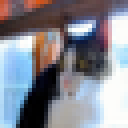
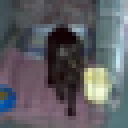
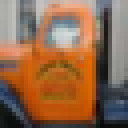
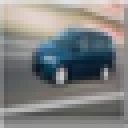
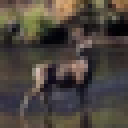
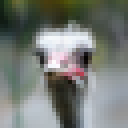
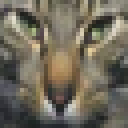
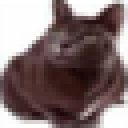
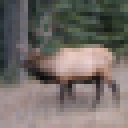
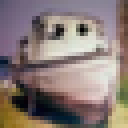

In [37]:
image(x) = x.img
image.(X[rand(1:end, 10)])

The images are simply 32 X 32 matrices of numbers in 3 channels (R,G,B). We can now
arrange them in batches of say, 1000 and keep a validation set to track our progress.

Defining a `getarray` function would help in converting the matrices to `Float` type.

In [38]:
getarray(X) = float.(permutedims(channelview(X), (2, 3, 1)))
imgs = [getarray(X[i].img) for i in 1:50000];

The first 49k images (in batches of 1000) will be our training set, and the rest is
for validation. `partition` handily breaks down the set we give it in consecutive parts
(1000 in this case). `cat` is a shorthand for concatentaing multi-dimensional arrays along
any dimension.

In [39]:
train = gpu.([(cat(imgs[i]..., dims = 4), labels[:,i]) for i in partition(1:49000, 1000)])
valset = 49001:50000
valX = cat(imgs[valset]..., dims = 4) |> gpu
valY = labels[:, valset] |> gpu

10×1000 Flux.OneHotMatrix{CuArrays.CuArray{Flux.OneHotVector,1}}:
 false  false  false  false   true  …  false  false  false  false  false
 false  false  false  false  false     false  false  false   true   true
 false  false  false  false  false      true  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false   true  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false   true  false  false  false
 false  false  false  false  false     false  false  false  false  false
  true  false  false  false  false     false  false  false  false  false
 false   true  false   true  false     false  false   true  false  false

## Defining the Classifier
--------------------------
Now we can define our Convolutional Neural Network (CNN).

In [40]:
m = Chain(
  Conv((5,5), 3=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((5,5), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(200, 120),
  Dense(120, 84),
  Dense(84, 10),
  softmax) |> gpu
# We will use a crossentropy loss and an Momentum optimiser here. Crossentropy will be a
# good option when it comes to working with mulitple independent classes. Momentum gradually
# lowers the learning rate as we proceed with the training. It helps maintain a bit of
# adaptivity in our optimisation.
using Flux: crossentropy, Momentum

loss(x, y) = sum(crossentropy(m(x), y))
opt = Momentum(params(m), 0.01)

#43 (generic function with 1 method)

We can start writing our train loop where we will keep track of some basic accuracy
numbers about our model. We can define an `accuracy` function for it like so.

In [41]:
accuracy(x, y) = mean(onecold(m(x), 1:10) .== onecold(y, 1:10))

accuracy (generic function with 1 method)

## Training
-----------

Training is where we do a bunch of the interesting operations we defined earlier,
and see what our net is capable of. We will loop over the dataset 100 times and
feed the inputs to the neural network and optimise.

In [42]:
epochs = 10

for epoch = 1:epochs
  for d in train
    l = loss(d...)
    back!(l)
    opt()
    @show accuracy(valX, valY)
  end
end

accuracy(valX, valY) = 0.114
accuracy(valX, valY) = 0.113
accuracy(valX, valY) = 0.115
accuracy(valX, valY) = 0.116
accuracy(valX, valY) = 0.113
accuracy(valX, valY) = 0.114
accuracy(valX, valY) = 0.114
accuracy(valX, valY) = 0.114
accuracy(valX, valY) = 0.114
accuracy(valX, valY) = 0.114
accuracy(valX, valY) = 0.114
accuracy(valX, valY) = 0.115
accuracy(valX, valY) = 0.115
accuracy(valX, valY) = 0.122
accuracy(valX, valY) = 0.123
accuracy(valX, valY) = 0.135
accuracy(valX, valY) = 0.144
accuracy(valX, valY) = 0.153
accuracy(valX, valY) = 0.163
accuracy(valX, valY) = 0.174
accuracy(valX, valY) = 0.174
accuracy(valX, valY) = 0.171
accuracy(valX, valY) = 0.168
accuracy(valX, valY) = 0.169
accuracy(valX, valY) = 0.167
accuracy(valX, valY) = 0.169
accuracy(valX, valY) = 0.167
accuracy(valX, valY) = 0.166
accuracy(valX, valY) = 0.166
accuracy(valX, valY) = 0.166
accuracy(valX, valY) = 0.165
accuracy(valX, valY) = 0.163
accuracy(valX, valY) = 0.165
accuracy(valX, valY) = 0.16
accuracy(valX, 

Seeing our training routine unfold gives us an idea of how the network learnt in the
period of time. This is not bad for a small hand-written network, trained for a limited
time.

Training on a GPU
-----------------

The `gpu` functions you see sprinkled through this bit of the code tell Flux to move
these entities to GPU if available, and subsequently train on them. No extra faffing
about required! The same bit of code would work on any hardware with some small
annotations like you saw here.

## Testing the Network
----------------------

We have trained the network for 100 passes over the training dataset. But we need to
check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and
checking it against the ground-truth.

Okay, first step. Let's set up the test set, exactly like we did our train set.

In [43]:
valset = valimgs(CIFAR10)
valimg = [getarray(valset[i].img) for i in 1:10000]
labels = onehotbatch([valset[i].ground_truth.class for i in 1:10000],1:10)
test = gpu.([(cat(valimg[i]..., dims = 4), labels[:,i]) for i in partition(1:10000, 1000)]);

We should take a look at some of the images from the test set.

,,,,,,,,,

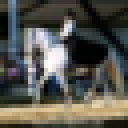
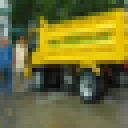
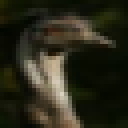
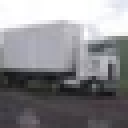
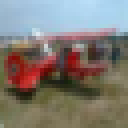
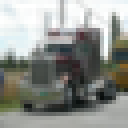
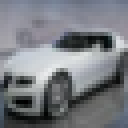
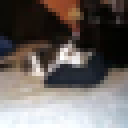
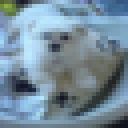
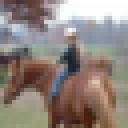

In [44]:
image.(valset[rand(1:end, 10)])

These images look similar to the ones we trained on.
Let's see how the model fared.

In [45]:
accuracy(test[1]...)

0.463

This is much better than random chance set at 10% (since we only have 10 classes), and
not bad at all for a small hand written network like ours.

Let's take a look at how the net performed on all the classes performed individually.

In [46]:
class_correct = zeros(10)
class_total = zeros(10)
for i in 1:10
  preds = m(test[i][1])
  lab = test[i][2]
  for j = 1:1000
    pred_class = findmax(preds[:, j])[2]
    actual_class = findmax(lab[:, j])[2]
    if pred_class == actual_class
      class_correct[pred_class] += 1
    end
    class_total[actual_class] += 1
  end
end

class_correct ./ class_total

10-element Array{Float64,1}:
 0.447
 0.535
 0.162
 0.222
 0.301
 0.499
 0.702
 0.436
 0.727
 0.477

The spread seems pretty good, with certain classes performing significantly better than the others.
Why should that be?